<a href="https://colab.research.google.com/github/dTony33/Machine-Learning/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/soerenab/AudioMNIST


Cloning into 'AudioMNIST'...
remote: Enumerating objects: 30122, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 30122 (delta 0), reused 0 (delta 0), pack-reused 30119
Receiving objects: 100% (30122/30122), 944.54 MiB | 33.18 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Checking out files: 100% (30018/30018), done.


In [2]:
import os
import numpy as np
import json
import librosa
import pandas as pd
import glob
import librosa.display as dsp
import scipy.io.wavfile as wavf
import scipy.signal
import h5py
from sklearn.preprocessing import StandardScaler

from IPython.display import Audio, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# data = os.dir

In [3]:
# data = map[(os.path.join('/content/AudioMNIST/data', folder),os.path.join('/content/AudioMNIST/data_processed', folder),
# '/content/AudioMNIST/data/audioMNIST_meta.txt') for folder in sorted(folders)]

In [4]:
# import glob
# for i in folders:
#   for filepath in sorted(glob.glob(os.path.join('/content/AudioMNIST/data'+ i, "*.wav"))):

#         # infer sample info from name
#         dig, vp, rep = filepath.rstrip(".wav").split("/")[-1].split("_")

#         print(dig,vp,rep)

In [5]:
def get_audio(digit=0):
    # Audio Sample Directory
    sample = np.random.randint(1,60)
    # Index of Audio
    index = np.random.randint(1,5)
    
    # Modified file location
    if sample<10:
        file = f"/content/AudioMNIST/data/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"/content/AudioMNIST/data/{sample}/{digit}_{sample}_{index}.wav"

    
    # Get Audio from the location
    data,sample_rate = librosa.load(file)
    
    # Plot the audio wave
    dsp.waveshow(data,sr=sample_rate)
    plt.show()
    x= librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))

    dsp.specshow(xdb,sr = sample_rate)
    plt.show()
    
    # Show the widget
    return Audio(data=data,rate=sample_rate)

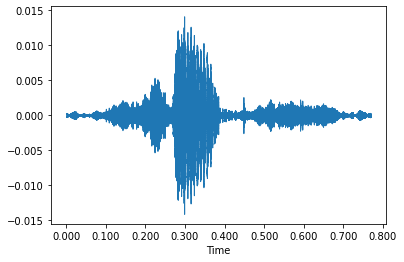

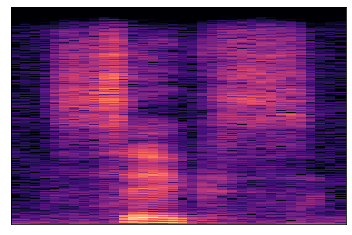

In [6]:
get_audio(6)

In [7]:
def data(file_path):
  
  meta_info = json.load(open('/content/AudioMNIST/data/audioMNIST_meta.txt'))
  folders = []
  preprocessed = []
  for folder in os.listdir(file_path):
        # print(folder)
        # only process folders
        if not os.path.isdir(os.path.join(file_path, folder)):
            continue
        folders.append(folder)
  for i in folders:
    for filepath in sorted(glob.glob(os.path.join(file_path+ '/' +i))):
      for audio_file in sorted(glob.glob(os.path.join(filepath,"*.wav"))):
        length, data_arrays = wavf.read(audio_file)
        #digit, folder, number
        digit,folder,number = audio_file.rstrip(".wav").split("/")[-1].split("_")
        data = librosa.core.resample(y = data_arrays.astype(np.float32),orig_sr = length,target_sr=8000,res_type = 'scipy')
        #transforming data for padding
        if len(data)==8000:
          transformed_Data = data
        if len(data) > 8000:
          pass
        if len(data) < 8000:
          #broadcasting
          transformed_Data = np.zeros(8000)
          off = np.random.randint(low=0,high = 8000 -len(data))
          transformed_Data[off:off+len(data)] = data
        if meta_info[folder]["gender"] == "male":
          gender = 0
        else:
          gender = 1
        preprocessed.append([transformed_Data,digit,gender])
  return preprocessed

In [19]:
def data_wave(file_path):
  
  meta_info = json.load(open('/content/AudioMNIST/data/audioMNIST_meta.txt'))
  folders = []
  preprocessed = []
  for folder in os.listdir(file_path):
        # print(folder)
        # only process folders
        if not os.path.isdir(os.path.join(file_path, folder)):
            continue
        folders.append(folder)
  for i in folders:
    for filepath in sorted(glob.glob(os.path.join(file_path+ '/' +i))):
      for audio_file in sorted(glob.glob(os.path.join(filepath,"*.wav"))):
        data_arrays,_ = librosa.load(audio_file,sr = 8000)
        data_arrays = data_arrays.reshape(-1,1)
        #digit, folder, number
        digit,folder,number = audio_file.rstrip(".wav").split("/")[-1].split("_")
        data = (data_arrays - np.mean(data_arrays))/np.std(data_arrays)
        
        #transforming data for padding
        if len(data)==8000:
          transformed_Data = data
        if len(data) > 8000:
          transformed_Data = data
          
        if len(data) < 8000:
          transformed_Data = np.concatenate((data,np.zeros(shape =(8000 - len(data),1))))
          #broadcasting
        if meta_info[folder]["gender"] == "male":
          gender = 0
        else:
          gender = 1
        preprocessed.append([transformed_Data,digit,gender])
  return preprocessed

In [ ]:
preprocessed  = data('/content/AudioMNIST/data')


In [20]:
wave = data_wave('/content/AudioMNIST/data')

In [74]:
def fourier_transform(transformed_Data):
  
   _,_, stft = scipy.signal.stft(transformed_Data,8000,nperseg =455,noverlap = 420, window = 'hann')
   stft = np.abs(stft[0:227, 2:-1])
   stft = np.atleast_3d(stft)
  #  stft = np.mean(stft.T,axis = 0)
   # convert to decibel
   stft = librosa.amplitude_to_db(stft, ref = np.max)
  #  tmp_X = np.zeros([1, 1, 227, 227])
  #  tmp_X[0, 0] = stft
  #  final_array = tmp_X
   return stft

def waveform(transformed_Data):
  data = transformed_Data
  data /= (np.percentile(transformed_Data, 95) + 0.001)
  audio_tmp = np.zeros([1,1,1,8000])
  audio_tmp[0,0,0] = data
  audio_final_array = audio_tmp
  return audio_final_array

In [59]:
alexnet = []

for i in range(len(preprocessed)):
  fourier = fourier_transform(preprocessed[i][0])
  alexnet.append([fourier,int(preprocessed[i][1]),preprocessed[i][2]])




In [75]:
audio_waves = []
for i in range(len(preprocessed)):
  waves = waveform(preprocessed[i][0])
  audio_waves.append([waves,int(preprocessed[i][1]),preprocessed[i][2]]) 

In [63]:
alexnet_df = pd.DataFrame(alexnet, columns = ['features','class_digit','class_gender'])

In [77]:
waveform_df = pd.DataFrame(audio_waves, columns = ['features','class_digit','class_gender'])

In [65]:
X = np.array(alexnet_df['features'].to_list())
y = np.array(alexnet_df['class_digit'].to_list())
yg = np.array(alexnet_df['class_gender'].to_list())

In [78]:
X_audio_wf = np.array(waveform_df['features'].to_list())
y_audio_wf = np.array(waveform_df['class_digit'].to_list())
yg_audio_wf = np.array(waveform_df['class_gender'].to_list())

In [67]:
X_train_al, X_test_al, y_train_al, y_test_al  = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_al, X_val_al, y_train_al, y_val_al = train_test_split(X_train_al, y_train_al, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [68]:
X_train_al2, X_test_al2, y_train_al2, y_test_al2  = train_test_split(X, yg, test_size=0.2, random_state=1)

X_train_al2, X_val_al2, y_train_al2, y_val_al2 = train_test_split(X_train_al2, y_train_al2, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [79]:
X_train_an, X_test_an, y_train_an, y_test_an  = train_test_split(X_audio_wf, y_audio_wf, test_size=0.2, random_state=1)

X_train_an, X_val_an, y_train_an, y_val_an = train_test_split(X_train_an, y_train_an, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [80]:
X_train_an2, X_test_an2, y_train_an2, y_test_an2  = train_test_split(X_audio_wf, yg_audio_wf, test_size=0.2, random_state=1)

X_train_an2, X_val_an2, y_train_an2, y_val_an2 = train_test_split(X_train_an2, y_train_an2, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [81]:
input = X_train_an2.shape
input

(18000, 1, 1, 1, 8000)

In [82]:
X_train_an[0].shape

(1, 1, 1, 8000)

In [83]:
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.layers import Dense, Dropout

# To create a checkpoint and save the best model
from keras.callbacks import ModelCheckpoint

# To load the model
from keras.models import load_model

# To check the metrics of the model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [84]:
model_alexnet = keras.Sequential()
model_alexnet.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(227, 227, 1)))
model_alexnet.add(layers.BatchNormalization())
model_alexnet.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model_alexnet.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet.add(layers.BatchNormalization())
model_alexnet.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model_alexnet.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet.add(layers.BatchNormalization())
model_alexnet.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet.add(layers.BatchNormalization())
model_alexnet.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet.add(layers.BatchNormalization())
model_alexnet.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model_alexnet.add(layers.Flatten())
model_alexnet.add(layers.Dense(4096, activation="relu"))
model_alexnet.add(layers.Dropout(0.5))
model_alexnet.add(layers.Dense(10, activation="softmax"))
model_alexnet.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.01), 
              metrics=['accuracy'])

model_alexnet.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 55, 55, 96)        11712     
                                                                 
 batch_normalization_16 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_17 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [85]:
model_alexnet2 = keras.Sequential()
model_alexnet2.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(227, 227, 1)))
model_alexnet2.add(layers.BatchNormalization())
model_alexnet2.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model_alexnet2.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet2.add(layers.BatchNormalization())
model_alexnet2.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model_alexnet2.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet2.add(layers.BatchNormalization())
model_alexnet2.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet2.add(layers.BatchNormalization())
model_alexnet2.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))
model_alexnet2.add(layers.BatchNormalization())
model_alexnet2.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model_alexnet2.add(layers.Flatten())
model_alexnet2.add(layers.Dense(4096, activation="relu"))
model_alexnet2.add(layers.Dropout(0.5))
model_alexnet2.add(layers.Dense(2, activation="softmax"))
model_alexnet2.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.01), 
              metrics=['accuracy'])

model_alexnet2.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 55, 55, 96)        11712     
                                                                 
 batch_normalization_21 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_22 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

In [ ]:
model_alexnet.fit(X_train_al,y_train_al, validation_data=(X_val_al,y_val_al),epochs = 12,batch_size=25)
model_alexnet2.fit(X_train_al2,y_train_al2, validation_data=(X_val_al2,y_val_al2),epochs = 12,batch_size=25)

Epoch 1/12
714/720 [============================>.] - ETA: 0s - loss: 0.6130 - accuracy: 0.8690

conv3-100,
maxpool2, conv3-64, maxpool2, conv3-128, maxpool2, conv3-128,
maxpool2, conv3-128, maxpool2, conv3-128, maxpool2, FC-1024
FC-512, FC-10 (digit classification) or FC-2 (gender classification).

In [38]:
model_audionet = keras.Sequential()
model_audionet.add(layers.Conv3D(filters=100, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", padding='same',
                        input_shape=(227,227,1)))

model_audionet.add(layers.MaxPool2D(strides= (2, 2)))
model_audionet.add(layers.Conv3D(filters=64, kernel_size=(5,5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides=(2, 2)))
model_audionet.add(layers.Conv3D(filters=128, kernel_size=(5,5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides= (2, 2)))
model_audionet.add(layers.Conv3D(filters=128, kernel_size=(5,5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides= (2, 2)))
model_audionet.add(layers.Conv3D(filters=128, kernel_size=(5,5), 
                        strides=(1, 1), activation="relu",
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides=(2, 2)))
model_audionet.add(layers.Conv3D(filters=128, kernel_size=(5,5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides=(2, 2)))
model_audionet.add(layers.Flatten())
model_audionet.add(layers.Dense(1024, activation="relu"))
model_audionet.add(layers.Dense(512, activation="relu"))
model_audionet.add(layers.Dropout(0.5))
model_audionet.add(layers.Dense(10, activation="softmax"))
model_audionet.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.01), 
              metrics=['accuracy'])

model_audionet.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 227, 227, 100)     2600      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 113, 113, 100)    0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 113, 113, 64)      160064    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 128)     

In [42]:
model_audionet = keras.Sequential()
model_audionet.add(layers.Conv3D(filters=100, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", padding='same',
                        input_shape=(227,227,1)))

model_audionet.add(layers.MaxPool2D(strides= (2, 2)))
model_audionet.add(layers.Conv3D(filters=64, kernel_size=(5,5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides=(2, 2)))
model_audionet.add(layers.Conv3D(filters=128, kernel_size=(5,5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides= (2, 2)))
model_audionet.add(layers.Conv3D(filters=128, kernel_size=(5,5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides= (2, 2)))
model_audionet.add(layers.Conv3D(filters=128, kernel_size=(5,5), 
                        strides=(1, 1), activation="relu",
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides=(2, 2)))
model_audionet.add(layers.Conv3D(filters=128, kernel_size=(5,5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model_audionet.add(layers.MaxPool2D( strides=(2, 2)))
model_audionet.add(layers.Flatten())
model_audionet.add(layers.Dense(1024, activation="relu"))
model_audionet.add(layers.Dense(512, activation="relu"))
model_audionet.add(layers.Dropout(0.5))
model_audionet.add(layers.Dense(2, activation="softmax"))
model_audionet.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.optimizers.SGD(lr=0.01), 
              metrics=['accuracy'])

model_audionet.summary()


ValueError: ignored

In [ ]:
pip install git+https://github.com/paulgavrikov/visualkeras

In [ ]:
import visualkeras
visualkeras.layered_view(model_alexnet)

In [ ]:
visualkeras.layered_view(model_audionet)

In [ ]:

# model_audionet.fit(X_train_an,y_train_an, validation_data=(X_val_an,y_val_an),epochs = 12,batch_size=25)
# model_audionet2.fit(X_train_an2,y_train_an2, validation_data=(X_val_an2,y_val_an2),epochs = 12,batch_size=25)

Epoch 1/12


ValueError: ignored

In [ ]:
y_pred = model.predict(X_test_du)
y_pred = [np.argmax(i) for i in y_pred]

In [ ]:
print(classification_report(y_test_du,y_pred))